# Sigma Point Sets

Here we outline the sigma point sets available in TUT. We present algorithms for generating sigma point sets for a standard Gaussian weighting function, or prior distribution in the Bayesian inference parlance, $\mathcal{N}(\pmb{0}, I)$ in $n$ dimensions with mean $\pmb{0}$ and identity covariance. Sigma points are denoted $\chi_i$, mean weights $w_m^i$, and covariance weights $w_c^i$. General Gaussian priors $\mathcal{N}(\pmb{x_0}, P_x)$ are handled by transforming each sigma points $\chi_i$ according to 
\begin{equation}
\pmb{\chi_i}' = \sqrt{P_x} \pmb{\chi_i} + \pmb{x_0}
\end{equation}
where $\sqrt{P_x}$ is a matrix square root of $P_x$. Weights remain unchanged. The notation $\pmb{e_i}$ refers to the $i$-th column of the $n \times n$ identity matrix. The following sigma point sets are available in the Totally Unscented Transform library (TUT). 

<table style="width:100%">
  <tr>
    <th>Shorthand Name</th>
    <th>Number of Points</th> 
    <th>Order</th>
  </tr>
  <tr>
    <td>merwe</td>
    <td>$2n+1$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>gauss</td>
    <td>$2n+1$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>julier</td>
    <td>$2n+1$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>menegaz</td>
    <td>$n+1$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>simplex</td>
    <td>$n+1$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>gauss_hermite</td>
    <td>$3^n$</td> 
    <td>3</td>
  </tr>
  <tr>
    <td>zm</td>
    <td>$2n^2 + 1$</td> 
    <td>5</td>
  </tr>
    <tr>
    <td>mysovskikh</td>
    <td>$n^2 + 3n + 3$</td> 
    <td>5</td>
  </tr>
</table>



## Van der Merwe Sigma Points

The default set of sigma points in in filterpy is the Van der Merwe sigma point set, originally introduced in Rudolph Van der Merwe's PhD dissertation \cite{Merwe2004}. The $2n + 1$ sigma points are given by
\begin{equation}
\pmb{\chi_i} =
\begin{cases} 
      \pmb{x_0} & i = 0 \\
      \pmb{x_0} - \sqrt{n + \lambda} \pmb{e_i} & i = 1, \cdots, n\\
      \pmb{x_0} + \sqrt{n + \lambda} \pmb{e_i} & i = n+1, \cdots, 2n
\end{cases}
\end{equation}
where
\begin{equation}
\lambda = \alpha^2 (n + \kappa) - n.
\end{equation}

There are different weights $w_i^m$ and $w_i^c$ for computing mean and covariance estimates respectively:

\begin{equation}
w_i^m =
\begin{cases} 
      \frac{\lambda}{n + \lambda} & i = 0 \\
      \frac{1}{2(n+\lambda)} & i = 1, \cdots, 2n
\end{cases}
\end{equation}

\begin{equation}
w_i^c =
\begin{cases} 
      \frac{\lambda}{n + \lambda} + 1 - \alpha^2 + \beta & i = 0 \\
      \frac{1}{2(n+\lambda)} & i = 1, \cdots, 2n
\end{cases}
\end{equation}

Appropriate default choices of the scaling parameters are, $\beta = 2$, $\kappa = 3 - n$, and $0 \leq \alpha \leq 1$. Unless otherwise specified, these are the values used by TUT.

In [1]:
from filterpy.kalman.tut.tut_sigmas import TutSigmaPoints
import numpy as np
import matplotlib.pyplot as plt

# Prior mean
x0 = np.zeros(2)
# Prior covariance
Px = np.eye(2)

# Van der Merwe sigma points in 2D
points = TutSigmaPoints()
X1, wm, wc = points.get_set(x0, Px, set_name = 'merwe')
# Different scaling parameters
X2, wm, wc = points.get_set(x0, Px, set_name = 'merwe', alpha = 0.9)

plt.scatter(X1[0,:], X1[1,:], s = 250.*wm / wm.max())
plt.scatter(X2[0,:], X2[1,:], s = 250.*wm / wm.max(), marker = '^')
plt.show()


<Figure size 640x480 with 1 Axes>

## Gauss Sigma Points

Gauss sigma points are just van der Merwe sigma points with $\alpha=1$, $\beta=0$ and $\kappa=3$.

## Julier Sigma Points

Another commonly used sigma point set is the Julier set \cite{Julier1997}.  It has $2n+1$ points with a single scaling parameter $\kappa$. Setting $\kappa = 3 - n$ results in a method that matches one higher order moment, and hence this is the preferred default value. As with all scaling parameters, however, the best choice is problem dependent. Points are given by:
\begin{equation}
\pmb{\chi_i} =
\begin{cases} 
      \pmb{x_0} & i = 0 \\
      \pmb{x_0} - \sqrt{n + \kappa} \pmb{e_i} & i = 1, \cdots, n\\
      \pmb{x_0} + \sqrt{n + \kappa} \pmb{e_i} & i = n+1, \cdots, 2n
\end{cases}
\end{equation}
Weights are given by:
\begin{equation}
w_i^m = w_i^c =
\begin{cases} 
      \frac{\kappa}{n + \kappa} & i = 0 \\
      \frac{1}{2(n+\kappa)} & i = 1, \cdots, 2n
\end{cases}
\end{equation}

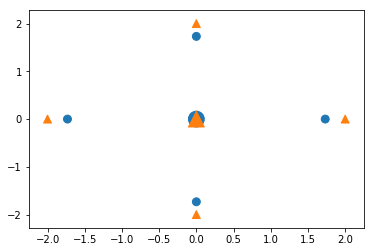

In [2]:
# Julier points in 2D
points = TutSigmaPoints()
X1, wm, wc = points.get_set(x0, Px, set_name = 'julier')
# Different scaling parameter
X2, wm, wc = points.get_set(x0, Px, set_name = 'julier', kappa = 2.)

plt.scatter(X1[0,:], X1[1,:], s = 250.*wm / wm.max())
plt.scatter(X2[0,:], X2[1,:], s = 250.*wm / wm.max(), marker = '^')
plt.show()

## Menegaz Sigma Points

A computationally minimal set of $n+1$ sigma points, with one scaling parameter $0 < w_0 < 1$, is outlined in \cite{Menegaz2011}. Some additional notation is necessary to define the point and weight sets. The notation $[a]_{p \times q}$ with $a \in \mathbb{R}$ represents a matrix of dimension $p \times q$ in which all terms are equal to $a$. The notation $\text{diag}(\pmb{x})$ for $\pmb{x} \in \mathbb{R}^n$ denotes an $n \times n$ matrix with $\pmb{x}$ on the diagonal. Using these definitions, we have:
\begin{equation}
X = \left [ \pmb{\chi_0} \cdots \pmb{\chi_n} \right ] = \left [- \frac{[\alpha]_{n \times 1}}{w_0} \; \; C (\sqrt{W})^{-1} \right ] + \left [ \pmb{x_0} \cdots \pmb{x_0} \right ]
\end{equation}

\begin{equation}
W = \text{diag}([w_1, \cdots, w_n])
\end{equation}

\begin{equation}
\begin{bmatrix} 
w_1 & \cdots & \sqrt{w_1}\sqrt{w_n} \\
\vdots & \ddots & \vdots \\
\sqrt{w_1} \sqrt{w_n} & \cdots & w_n 
\end{bmatrix}
= w_0 \alpha^2 C^{-1} [1]_{n \times n} (C^T)^{-1}
\end{equation}

\begin{equation}
C = \sqrt{I - \alpha^2 [1]_{n \times n}}
\end{equation}

\begin{equation}
\alpha = \sqrt{\frac{1 - w_0}{n}}
\end{equation}

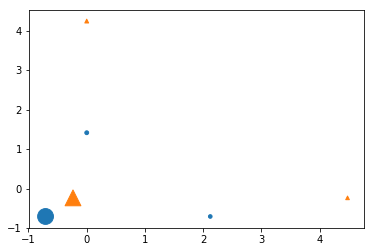

In [3]:
# Menegaz points in 2D
X1, wm, wc = points.get_set(x0, Px, set_name = 'menegaz')
# Different scaling parameter
X2, wm, wc = points.get_set(x0, Px, set_name = 'menegaz', w0 = .9)

plt.scatter(X1[0,:], X1[1,:], s = 250.*wm / wm.max())
plt.scatter(X2[0,:], X2[1,:], s = 250.*wm / wm.max(), marker = '^')
plt.show()

## Simplex Sigma Points

Another minimal set of $n+1$ sigma points, called the simplex set, is given in \cite{Moireau2011}. A matrix containing the sigma points as column vectors
\begin{equation}
X_{n+1}^* = \left [ \pmb{\chi_0} \cdots \pmb{\chi_n} \right ] 
\end{equation}
is generated recursively. Letting 
\begin{equation}
X_1 = \left [-\frac{1}{2 \alpha} \quad \frac{1}{2 \alpha} \right ]
\end{equation}
where $\alpha = \frac{n}{n+1}$, $X_i^*$ is generated from $X_{i-1}^*$ via
\begin{equation}
X_i^* = 
\begin{bmatrix} 
 & & & 0 \\
 & X_{i-1}^* & & \vdots \\
 & & & 0 \\
 \frac{1}{\sqrt{\alpha i (i + 1)}} &  \frac{1}{\sqrt{\alpha i (i + 1)}} &  \frac{1}{\sqrt{\alpha i (i + 1)}} &  \frac{-i}{\sqrt{\alpha i (i + 1)}}
\end{bmatrix}.
\end{equation}
Weights are given by 
\begin{equation}
w_i^m = w_i^c = \alpha
\end{equation}.

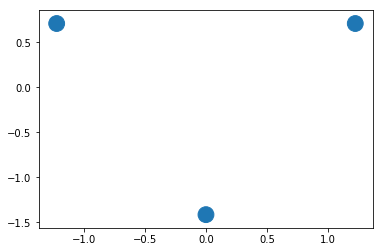

In [4]:
# Simplex points in 2D
X, wm, wc = points.get_set(x0, Px, set_name = 'simplex')

plt.scatter(X[0,:], X[1,:], s = 250.*wm / wm.max())
plt.show()

## Li Sigma Points

TUT includes a modified version of the fifth-order quadrature rule in \cite{Zhao-Ming2017}. It contains one scaling parameter $\lambda_2$. The quadrature rule is formulated in terms of fully symmetric sets of points. 

\begin{definition}[Fully Symmetric Set]
A set of points $S = \{\pmb{s_1}, \pmb{s_2}, \cdots, \pmb{s_N}\}$ is called fully symmetric if it is closed under the operations of coordinate position and sign permutations. The set $S$ is said to be generated by the vector $\pmb{s}$ if all points in $S$ can be obtained by coordinate position and sign permutations of $\pmb{s}$.
\end{definition}

Sigma points are categorized in terms of three fully symmetric sets
\begin{equation}
\begin{gathered}
X_0 = [0]_n  \\
X_1 = [\lambda_1]_n \\ 
X_2 = [\lambda_2, \lambda_2]_n
\end{gathered}
\end{equation}
where, for example, the notation $[\lambda_2, \lambda_2]_n$ refers to the fully symmetric set of points generated by the $n$-dimensional vector $[\lambda_2, \lambda_2, 0, \cdots, 0]^T$. The set $X_0$ is trivial, containing only the zero vector. An example of the fully symmetric set $[1,1]_3$ is shown below.

In [5]:
from filterpy.kalman.tut.tut_util import generate_fully_symmetric_set

# An aexample of the fully symmetric set [1,1]_3. Each column is 
# a point in the set
S = generate_fully_symmetric_set(3, np.array([1.,1.]))
print(S)

[[ 1.  1. -1. -1.  1.  1. -1. -1.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  0.  0.  0.  0.  1.  1. -1. -1.]
 [ 0.  0.  0.  0.  1. -1.  1. -1.  1. -1.  1. -1.]]


The parameter $\lambda_1$ depends on $\lambda_2$ with 
\begin{equation}
\lambda_1 = \frac{\lambda_2 \sqrt{n-4}}{n - \lambda_2^2 - 1}.
\end{equation}
Hence, this method requires $n \geq 5$ and $n - \lambda_2^2 - 1 \neq 0$. Each sigma point in a category has the same weight. Hence, the sets $X_0$, $X_1$, and $X_2$ have associated weights $w_0$, $w_1$, and $w_2$ respectively where
\begin{equation}
w_2 = \frac{4-n}{2 \lambda_1^4}
\end{equation}
\begin{equation}
w_3 = \frac{1}{4 \lambda_1^4}
\end{equation}
\begin{equation}
w_1 = 1 - 2 n w_2 - 2n(n-1)w_3.
\end{equation}

## Gauss-Hermite Sigma Points

The third order Gauss-Hermite quadrature rule is a generalization of the 1D Gauss-Hermite quadrature rule for integrating $\int_{\mathbb{R}} f(x) e^{-x^2} \; dx$. Weights and sigma points can be obtained using a tensor-product based formulation. The number of points grows exponentially with dimension, and the third order method requires a hefty $3^n$ points. An alternative formulation of the Gauss-Hermite sigma points involves categories of fully symmetric sets of sigma points \cite{Peng2017}. In particular, there are $n+1$ classes of sigma points
\begin{equation}
\begin{gathered}
X_0 = \left [ 0 \right ]_n \\
X_1 = \left [ \sqrt{3} \right ]_n \\ 
X_2 = \left [ \sqrt{3}, \sqrt{3} \right ]_n \\
\vdots \\
X_n = \left [\sqrt{3}, \cdots, \sqrt{3} \right ]_n.
\end{gathered}
\end{equation}
Each sigma point in a given fully symmetric category has the same weight. Weights for each category are given by
\begin{equation}
\begin{gathered}
w_0 = \left ( \frac{2}{3} \right )^n \\
w_1 = \left ( \frac{2}{3} \right )^{n-1} \left ( \frac{1}{6} \right ) \\
w_2 = \left ( \frac{2}{3} \right )^{n-2} \left ( \frac{1}{6} \right )^2 \\
\vdots \\
w_n = \left ( \frac{1}{6} \right )^n.
\end{gathered}
\end{equation}



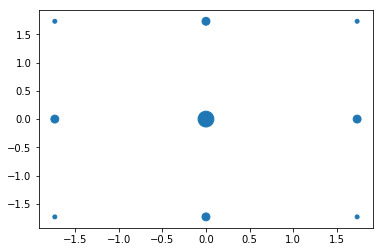

In [6]:
# Gauss-hermite sigma points in 2D
X, wm, wc = points.get_set(x0, Px, set_name = 'hermite')


plt.scatter(X[0,:], X[1,:], s = 250.*wm / wm.max())
plt.show()


## Mysovskikh Sigma Points

Another fifth order sigma point set is the Mysovskikh set consisting of $n^2 + 3n + 3$ points \cite{}. The quadrature rule can be obtained from the transformation group of the regular simplex with vertices $\pmb{a_1}, \cdots, \pmb{a_n}$ where $j$-th element of $\pmb{a_i}$ 
\begin{equation}
a_{i,j} = 
\begin{cases} 
      -\sqrt{ \frac{n+1}{n(n-j+2)(n-j+1)}} & i < j \\
      \sqrt{\frac{(n+1)(n-i+1)}{n(n-i+2)}} & i = j \\
      0 & i > j
\end{cases}.
\end{equation}
The points $\pmb{a_i}$ are sigma points, as are the origin $\pmb{0}$, and points in the set
\begin{equation}
\{ \pmb{b_k} \} = \left \{ \sqrt{\frac{n}{2(n-1)}} \left ( \pmb{a_l} + \pmb{a_m} \right ) \; | \; l < m, \; \; m = 1, 2, \cdots, n+1  \right \}. 
\end{equation}
The method is centrally symmetric. Hence, for every sigma point $\pmb{a_i}$ and $\pmb{b_k}$, -$\pmb{a_i}$ and -$\pmb{b_k}$ are also sigma points. The sigma point $\pmb{0}$ has associated weight $w_0$, while points $\pm \pmb{a_i}$ and $\pm \pmb{b_j}$ have associated weights $w_1$ and $w_2$ respectively

\begin{equation}
\begin{gathered}
w_0 = \frac{2}{n + 2} \\
w_1 = \frac{n^2 (7 - n)}{2(n+1)^2 (n+2)^2} \\
w_2 = \frac{2(n-1)^2}{(n+1)^2 (n+2)^2}.
\end{gathered}
\end{equation}

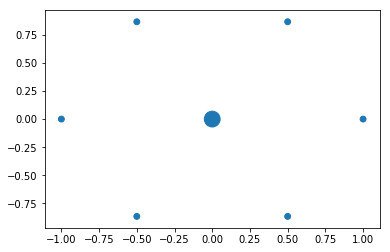

In [5]:
# Mysovskikh points in 2D
X, wm, wc = points.get_set(x0, Px, set_name = 'mysovskikh')

plt.scatter(X[0,:], X[1,:], s = 250.*wm / wm.max())
plt.show()


# References

(<a id="cit-Merwe2004" href="#call-Merwe2004">Van der Merwe, 2004</a>) Van der Merwe R., ``_Conjugate Unscented Transformation : Applications to Estimation and Control_'', , vol. , number , pp. ,  2004.

(<a id="cit-Julier1997" href="#call-Julier1997">Julier and Uhlmann, 1997</a>) Julier Simon J and Uhlmann Jeffrey K, ``_New extension of the Kalman filter to nonlinear systems_'', , vol. , number , pp. ,  1997.

(<a id="cit-Menegaz2011" href="#call-Menegaz2011">Menegaz, Ishihara <em>et al.</em>, 2011</a>) H.M. Menegaz, J.Y. Ishihara and G.A. Borges, ``_A new smallest sigma set for the Unscented Transform and its applications on SLAM_'', ,  2011.

(<a id="cit-Moireau2011" href="#call-Moireau2011">Moireau and Chapelle, 2011</a>) Moireau Philippe and Chapelle Dominique, ``_Erratum of article “Reduced-order Unscented Kalman Filtering with application to parameter identification in large-dimensional systems”_'', , vol. , number , pp. ,  2011.

(<a id="cit-Zhao-Ming2017" href="#call-Zhao-Ming2017">Zhao-Ming, Wen-Ge <em>et al.</em>, 2017</a>) Zhao-Ming Li, Wen-Ge Yang, Dan Ding <em>et al.</em>, ``_A novel algorithm of fifth-degree cubature Kalman filter for orbit determination at the lower bound approaching to the number of cubature points_'', , vol. , number , pp. ,  2017.

(<a id="cit-Peng2017" href="#call-Peng2017">Peng, Duan <em>et al.</em>, 2017</a>) Peng Lijun, Duan Xiaojun and Zhu Jubo, ``_A New Sparse Gauss-Hermite Cubature Rule Based on Relative-Weight-Ratios for Bearing-Ranging Target Tracking_'', Modelling and Simulation in Engineering, vol. , number , pp. ,  2017.

